In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [96]:
pd.set_option('display.max_colwidth', None)

In [97]:
df = pd.read_csv("../data/medical_corpus_clean.tsv", sep=',')
df = df[["id", "pol", "eng"]]
#df['pol'] = df['pol'].str.lower()
#df['eng'] = df['eng'].str.lower()
df

,id,pol,eng
0,9099592,1/ 31 1.,1/ 31 1.
1,14466574,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.
2,23812236,DOTYCZĄCE DOSTAWY I STOSOWANIA,Veterinary medicinal product subject to prescription.
3,11834247,51 jeśli u pacjenta wystąpi ból górnej części brzucha po lewej stronie lub ból na szczycie barku; •,• if you get left upper abdominal pain or pain at the tip of your shoulder;
4,30649221,Wydłużenie czasu protrombinowego (PT) (w przypadku jednoczesnego stosowania antagonistów witaminy K).,Prothrombin time (PT) increase (with concomitant vitamin K antagonist therapy).
...,...,...,...
1073449,20622458,"Delikatnie postukać w strzykawkę, aby usunąć pęcherzyki powietrza.","To remove any bubbles, gently tap the syringe."
1073450,36160198,dorosłych pacjentów z nowo rozpoznaną ostrą białaczką limfoblastyczną z chromosomem Philadelphia (Ph+ ALL) w skojarzeniu z chemioterapią.,adult patients with newly diagnosed Philadelphia chromosome positive acute lymphoblastic leukaemia (Ph+ ALL) integrated with chemotherapy.
1073451,5426867,"Podczas stosowania przewlekłego w badaniu RE–LY leki z grupy NLPZ zwiększały ryzyko krwawienia o około 50% zarówno w przypadku eteksylanu dabigatranu, jak i warfaryny.","With chronic use in the RE-LY study, NSAIDs increased the risk of bleeding by approximately 50 % on both dabigatran etexilate and warfarin."
1073452,12827040,Bardzo rzadko: ginekomastia,Depression.


In [98]:
ids = pd.read_csv("../data/preprocessed_ids.tsv", sep=',')
df = pd.merge(df, ids, on='id', how='inner')
df

,id,pol,eng,Unnamed: 0
0,14466574,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.,1
1,23812236,DOTYCZĄCE DOSTAWY I STOSOWANIA,Veterinary medicinal product subject to prescription.,2
2,11834247,51 jeśli u pacjenta wystąpi ból górnej części brzucha po lewej stronie lub ból na szczycie barku; •,• if you get left upper abdominal pain or pain at the tip of your shoulder;,3
3,30649221,Wydłużenie czasu protrombinowego (PT) (w przypadku jednoczesnego stosowania antagonistów witaminy K).,Prothrombin time (PT) increase (with concomitant vitamin K antagonist therapy).,4
4,25824079,Zaburzenia serca,Eye disorders Cardiac disorders,5
...,...,...,...,...
884765,3821855,"Zmiany obecne po 1 miesiącu podawania produktu były zasadniczo odwracalne w czasie do 1 miesiąca po zaprzestaniu podawania produktu, za wyjątkiem częściowego ustąpienia niektórych zmian w rogówce.",The findings present following 1 month of dosing were largely reversible within 1 month of cessation of dosing with the exception of partial recovery for some of the corneal changes.,1073448
884766,20622458,"Delikatnie postukać w strzykawkę, aby usunąć pęcherzyki powietrza.","To remove any bubbles, gently tap the syringe.",1073449
884767,36160198,dorosłych pacjentów z nowo rozpoznaną ostrą białaczką limfoblastyczną z chromosomem Philadelphia (Ph+ ALL) w skojarzeniu z chemioterapią.,adult patients with newly diagnosed Philadelphia chromosome positive acute lymphoblastic leukaemia (Ph+ ALL) integrated with chemotherapy.,1073450
884768,5426867,"Podczas stosowania przewlekłego w badaniu RE–LY leki z grupy NLPZ zwiększały ryzyko krwawienia o około 50% zarówno w przypadku eteksylanu dabigatranu, jak i warfaryny.","With chronic use in the RE-LY study, NSAIDs increased the risk of bleeding by approximately 50 % on both dabigatran etexilate and warfarin.",1073451


In [99]:
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            vector = np.array(values[1:], dtype=np.float64)
            embeddings[word] = vector
    return embeddings

en_file_path = '../muse/wiki.multi.en.vec'
pl_file_path = '../muse/wiki.multi.pl.vec'

en_embeddings = load_embeddings(en_file_path)
pl_embeddings = load_embeddings(pl_file_path)

def sentence_embedding(tokens, embeddings):
    word_embeddings = [embeddings[word] for word in tokens if word in embeddings]
    if len(word_embeddings) > 0:
        return np.mean(word_embeddings, axis=0)
    else:
        return None

def calculate_similarity(row):
    tokens_en = row['eng'].lower().split()
    tokens_pl = row['pol'].lower().split()

    sentence_embedding_en = sentence_embedding(tokens_en, en_embeddings)
    sentence_embedding_pl = sentence_embedding(tokens_pl, pl_embeddings)

    if sentence_embedding_en is not None and sentence_embedding_pl is not None:
        similarity = cosine_similarity([sentence_embedding_en], [sentence_embedding_pl])[0][0]
        return similarity
    else:
        return None

"""""
def compute_similarity(row):
    tokens_en = row['eng'].lower().split()
    tokens_pl = row['pol'].lower().split()

    sentence_embedding_en = sentence_embedding(tokens_en, en_embeddings)
    sentence_embedding_pl = sentence_embedding(tokens_pl, pl_embeddings)

#Output the results
    if sentence_embedding_en is not None and sentence_embedding_pl is not None:
            similarity = np.dot(sentence_embedding_en, sentence_embedding_pl) / (np.linalg.norm(sentence_embedding_en) * np.linalg.norm(sentence_embedding_pl))
            return similarity
    else:
        return None
"""""

df['score'] = df.apply(calculate_similarity, axis=1)

In [100]:
data = df.copy()

In [101]:
similiraty_list = df.score.to_list()

<Axes: ylabel='Count'>

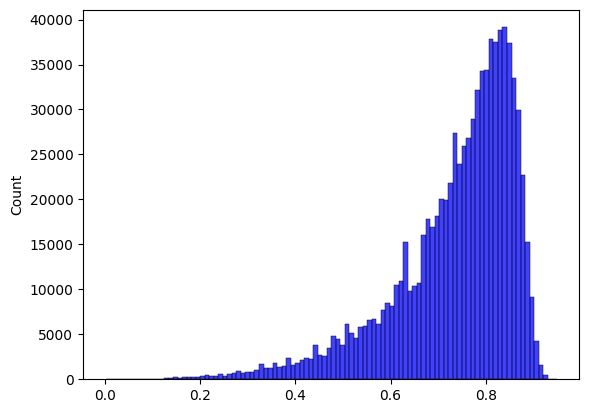

In [102]:
sns.histplot(similiraty_list, bins=100, color='blue', edgecolor='black')

In [103]:
print(df[['id', 'score']])

              id     score
0       14466574  0.801365
1       23812236  0.632247
2       11834247  0.768364
3       30649221  0.765585
4       25824079  0.732831
...          ...       ...
884765   3821855  0.816138
884766  20622458  0.740893
884767  36160198  0.809530
884768   5426867  0.858391
884769   3548782  0.680194

[884770 rows x 2 columns]


In [104]:
df_bad_scores = data[data['score'] < 0.2]
df_bad_scores.head()

,id,pol,eng,Unnamed: 0,score
262,17974287,Moulineaux Cedex Francja,Half-Scored tablet Oral use,333,0.189372
682,27426626,Pfizer ApS Lautrupvang 8,Lautrupvang 8 2750 Ballerup,850,0.181041
744,38020758,"2 Landman i wsp., 2008.","2 Landman et al., 2008.",933,0.196500
1357,13956342,EU/ 2/ 05/ 054/ 012 2 pipetki EU/ 2/ 05/ 054/ 013 4 pipetki,EU/2/05/054/012 2 pipettes EU/2/05/054/013 4 pipettes,1655,0.099243
2071,26087586,Termin ważności {miesiąc/rok},EXP {month/year},2525,0.183931


In [105]:
df_good_scores = df[df['score'] > 0.8]
df_good_scores

,id,pol,eng,Unnamed: 0,score
0,14466574,Urządzenia do odtworzenia i podawania dostarczane są w każdym opakowaniu Helixate NexGen 250 j. m.,Medical devices for reconstitution and administration are provided with each package of Helixate NexGen 250 IU.,1,0.801365
5,30513235,W takim przypadku należy odstąpić od podawania hCG aby uniknąć wystąpienia ciąży mnogiej. • Kontrolowana hiperstymulacja jajników w medycznych programach wspomaganego rozrodu Stosuje się różne protokoły stymulacji.,In that case hCG should be withheld and pregnancy should be avoided in order to prevent multiple gestations. • Controlled ovarian hyperstimulation in medically assisted reproduction programs Various stimulation protocols are applied.,6,0.889540
11,12592030,43 Zmiana typu lub rodzaju insuliny powinna odbywać się pod ścisłą kontrolą lekarza.,Transferring a patient to another type or brand of insulin should be done under strict medical supervision.,12,0.813378
12,5702288,"Dzieci i młodzież Nie należy podawać leku dzieciom w wieku poniżej 3 lat, ponieważ nie zostały przeprowadzone odpowiednie badania.",Children and adolescents Do not give this medicine to children under the age of 3 years because it has not been studied.,13,0.864390
13,9089335,"Gdy białka w komórkach nowotworowych, w tym białka kontrolujące wzrost komórek, nie są rozkładane, komórki nowotworowe zostają uszkodzone i w końcu giną.","When the proteins in the cancer cells are not broken down, including the proteins that control cell growth, the cancer cells are damaged and they eventually die.",14,0.879078
...,...,...,...,...,...
884763,22715788,"podobnego elektronicznego wyposażenia biurowego, w tym początkowego ze standardowym oprogramowaniem Agencji, niezbędnego na potrzeby specjalnych programów.","similar electronic office equipment and hardware, including initial equipment with the Agency’s standard software, which is needed for special programmes.",1073446,0.804681
884764,19426515,"Szczepionki nie powinno podawać się osobom z osłabionym układem odpornościowym, z powodu takich chorób jak białaczka, chłoniak, AIDS bądź chorób osłabiających układ odpornościowy.","The vaccine should not be used in people who have problems with their immune system, either because they have a disease such as leukaemia, lymphoma, AIDS, or because they are taking medicines that affect the immune system.",1073447,0.851153
884765,3821855,"Zmiany obecne po 1 miesiącu podawania produktu były zasadniczo odwracalne w czasie do 1 miesiąca po zaprzestaniu podawania produktu, za wyjątkiem częściowego ustąpienia niektórych zmian w rogówce.",The findings present following 1 month of dosing were largely reversible within 1 month of cessation of dosing with the exception of partial recovery for some of the corneal changes.,1073448,0.816138
884767,36160198,dorosłych pacjentów z nowo rozpoznaną ostrą białaczką limfoblastyczną z chromosomem Philadelphia (Ph+ ALL) w skojarzeniu z chemioterapią.,adult patients with newly diagnosed Philadelphia chromosome positive acute lymphoblastic leukaemia (Ph+ ALL) integrated with chemotherapy.,1073450,0.809530


In [120]:
df_nan_scores = df[df['score'].isna()]
df_nan_scores

,id,score
24,6701938,NaN
154,15881781,NaN
161,31241925,NaN
164,38973859,NaN
165,24967734,NaN
...,...,...
884494,38858993,NaN
884600,38770226,NaN
884665,11075037,NaN
884711,10675509,NaN


90066

In [107]:
90066/1073454

0.08390298978810456

In [108]:
16567/884770

0.018724640301999388

In [109]:
df[df['id'] == 23318404]


,id,pol,eng,Unnamed: 0,score
473,23318404,Tabletka do rozgryzania i żucia.,CHEWABLE TABLET.,589,NaN


In [110]:
file_path = 'nan_scores.tsv'
df_nan_scores.to_csv(file_path, sep='\t', index=False)

In [111]:
df = df[['id', 'score']]

In [112]:
df.rename(columns={"translation_score": "score"})

,id,score
0,14466574,0.801365
1,23812236,0.632247
2,11834247,0.768364
3,30649221,0.765585
4,25824079,0.732831
...,...,...
884765,3821855,0.816138
884766,20622458,0.740893
884767,36160198,0.809530
884768,5426867,0.858391


<Axes: xlabel='score'>

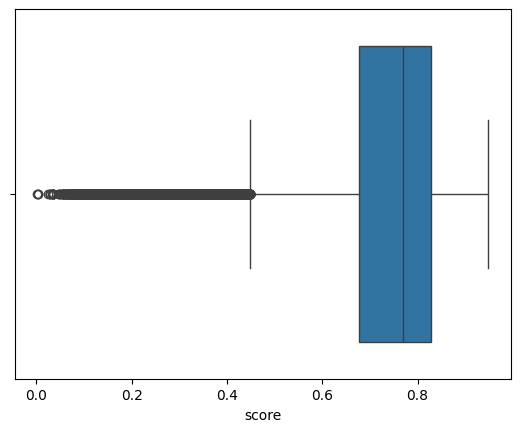

In [113]:
sns.boxplot(x=df["score"])

In [114]:
# Calculate quintiles using the quantile method
q1 = df['score'].quantile(0.20)  # 20th percentile (first quintile)
q2 = df['score'].quantile(0.40)  # 40th percentile (second quintile)
q3 = df['score'].quantile(0.60)  # 60th percentile (third quintile)
q4 = df['score'].quantile(0.80)  # 80th percentile (fourth quintile)
q5 = df['score'].quantile(1.00)  # 100th percentile (fifth quintile)

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}, Q5: {q5}')

Q1: 0.6441802408267152, Q2: 0.7377979293014657, Q3: 0.7956149541225417, Q4: 0.8395630686986932, Q5: 0.948470947044919


In [115]:
MUSE_above_quantile_20 = df[df['score'] > q1]
MUSE_above_quantile_40 = df[df['score'] > q2]
MUSE_above_quantile_60 = df[df['score'] > q3]
MUSE_above_quantile_80 = df[df['score'] > q4]


In [116]:
MUSE_above_quantile_20.to_csv("MUSE_above_quantile_20.tsv", sep='\t', index=False)
MUSE_above_quantile_40.to_csv("MUSE_above_quantile_40.tsv", sep='\t', index=False)
MUSE_above_quantile_60.to_csv("MUSE_above_quantile_60.tsv", sep='\t', index=False)
MUSE_above_quantile_80.to_csv("MUSE_above_quantile_80.tsv", sep='\t', index=False)

In [117]:
file_path = 'scores.tsv'
df.to_csv(file_path, sep='\t', index=False)